In [1]:
#Import modules
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import *
import matplotlib.pyplot as plt
from tensorflow.keras import preprocessing
from pathlib import Path

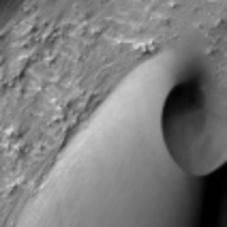

In [27]:
#Image path 
path = Path("map-proj\ESP_019559_1390_RED-0119.jpg")
#Load the image
img = image.load_img(path, target_size=(227,227))
image_array = image.img_to_array(img)
img

In [3]:
classifier_model = "modelv2.keras"

In [21]:
def prediction(image):
    classifier_model = "model.h5"
      
    model = load_model(classifier_model)
      
    test_image = image.resize((227,227))
    test_image = preprocessing.image.img_to_array(test_image)
    test_image = test_image / 227.0
    test_image = np.expand_dims(test_image, axis=0)
    test_image = np.reshape(test_image, (-1, 227, 227, 1))
    class_names = {0: 'other',1: 'crater',2: 'dark_dune',3: 'streak',4: 'bright_dune',5: 'impact',6: 'edge'}

    predictions = model.predict(test_image)
    scores = tf.nn.softmax(predictions[0])
    scores = scores.numpy()

    res = np.argmax(model.predict(test_image), axis=1)
    result = f"{class_names[np.argmax(scores)]} with a { (100 * np.max(scores)).round(2) } % confidence." 
    print(scores)
    return result

In [20]:
def predictionv2(image):
    classifier_model = "modelv2.keras"
      
    model = load_model(classifier_model)
      
    test_image = image.resize((227,227))
    test_image = preprocessing.image.img_to_array(test_image)
    test_image = test_image / 227.0
    test_image = np.expand_dims(test_image, axis=0)
    test_image = np.reshape(test_image, (-1, 227, 227, 1))
    class_names = {0: 'other',1: 'crater',2: 'dark_dune',3: 'streak',4: 'bright_dune',5: 'impact',6: 'edge'}

    predictions = model.predict(test_image)
    scores = tf.nn.softmax(predictions[0])
    scores = scores.numpy()

    res = np.argmax(model.predict(test_image), axis=1)
    result = f"{class_names[np.argmax(scores)]} with a { (100 * np.max(scores)).round(2) } % confidence." 
    print(scores)
    return result

In [28]:
prediction(img)

1/1 [==============================] - 0s 92ms/step
[0.1615206  0.20160961 0.1234367  0.1451315  0.12460798 0.12177213
 0.12192145]


'crater with a 20.16 % confidence.'

In [29]:
predictionv2(img)

1/1 [==============================] - 0s 84ms/step
[0.12777922 0.2891219  0.11660837 0.11660837 0.1166576  0.11660837
 0.11661621]


'crater with a 28.91 % confidence.'

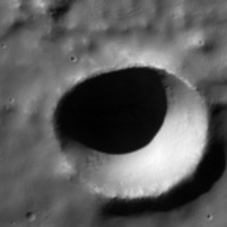

In [6]:
img